# 

## <span style="color: #336699">Parte 04B - Rodar o ACOLITE em Python </span>
<hr style="border:0.5px solid #0077b9;">


Para rodar o ACOLITE iremos utilizar como auxílio o pacote hypercoast, que é um pacote desenvolvido por Bingqing Liu e Qiusheng Wu (disponível aqui: https://hypercoast.org/#license). Ele é feito inicialmente para trabalhar com dados hiperesepctrais de sensoriamento remoto - mas com diversas aplicações importantes com dados multiespectrais - incluindo maneiras mais simples de instalar o ACOLITE e rodar ele em ambiente Jupyter Notebook - o que não é totalmente trivial. 

[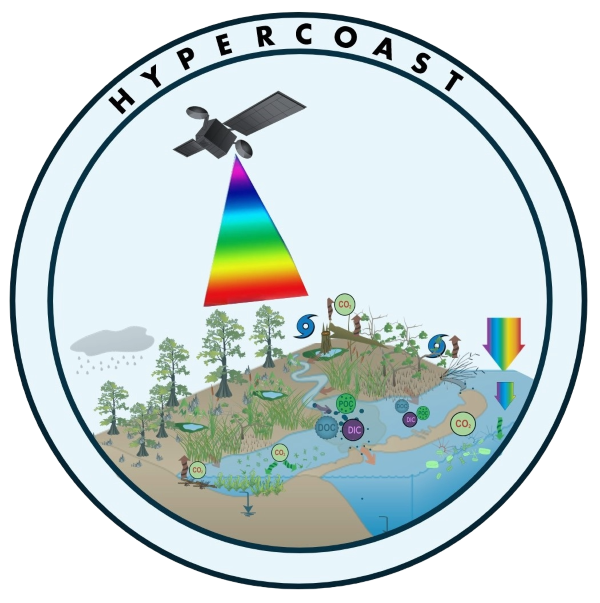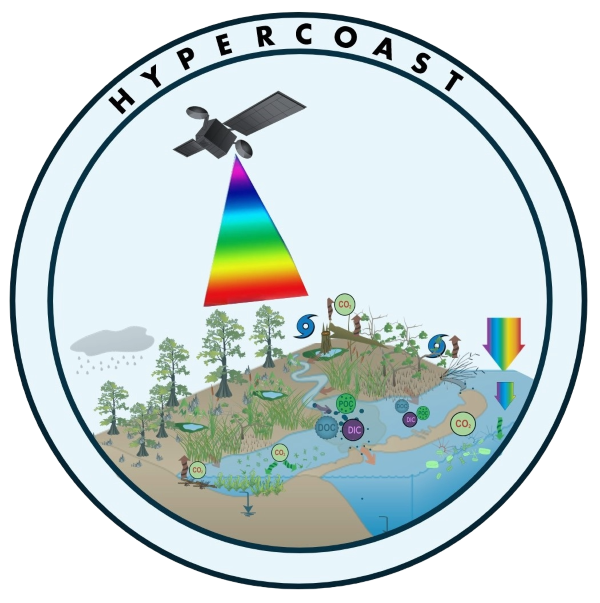]



<br>


In [ ]:
# Se você ainda não rodou este comando, você vai precisar instalar o ACOLITE e o HYPERCOAST!!!!!! Desmarque o # nessa linha


#!git clone --depth 1 https://github.com/acolite/acolite
#pip install "hypercoast[extra]"

In [ ]:
import os
import hypercoast
import glob

In [ ]:
acolite_dir = hypercoast.download_acolite('acolite/')
print(f"Acolite directory: {acolite_dir}")

In [ ]:
out_dir = os.path.join('Outputs', "acolite_results")

In [ ]:
# Primeiro, eu preciso extrair os ZIPs (bundles) baixados com o RSTAC. Você pode fazer manualmente ou por código como abaixo

#Criar pasta para extrair os zips

from pathlib import Path
import zipfile
import os


# Pasta com os ZIPs extraidos que sera criada
pasta_destino = Path("Outputs/Extraidos/")
pasta_destino.mkdir(parents=True, exist_ok=True)  # Se n existir, crio a pasta

# Path base das imagens
path_images = 'Outputs/bdc/'

# Aqui vou fazer a busca recursiva dos arquivos .ZIP .zip
arquivos_zip = glob.glob(os.path.join(path_images, "**", "*.zip"), recursive=True)

print(arquivos_zip)

# Loop para extrair todos os .zip
for zip_path in arquivos_zip:
    nome_arquivo = Path(zip_path).stem  # Nome do zip sem extensão
    print(nome_arquivo)
    destino_individual = pasta_destino  # Pasta para este zip
    print(destino_individual)
    destino_individual.mkdir(exist_ok=True)

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(destino_individual)  # Extrai o que tem o arquvio

    print(f"Extraído: {zip_path} → {destino_individual}")


In [ ]:
input_dir = os.path.join('Outputs/', "Extraidos")
input_files = [os.path.join(input_dir, f) for f in os.listdir(input_dir)]
input_files

In [ ]:
for i in input_files:

    output_dir = str.replace(i, 'Extraidos', "ACOLITE")
    
    hypercoast.run_acolite(
        acolite_dir=acolite_dir,
        input_file=i,
        out_dir=output_dir,
        l2w_parameters="Rrs_*",
        rgb_rhot=True,
        rgb_rhos=True,
        map_l2w=True,
        polygon = 'Billings.shp', #Polígono do reservatório
        l2w_export_geotiff = True) # Exporta o L2W em Geotiff


